In [1]:
import numpy as np
import pandas as pd
import yaml
import requests
import urllib
import imageio
from pathlib import Path
from skimage.transform import resize
import matplotlib.pyplot as plt
import PIL
from PIL import ImageEnhance
%matplotlib inline

In [2]:
PIL.Image.MAX_IMAGE_PIXELS = 2000000000

In [3]:
class Lat():
    def __init__(self, a):
        assert type(a) == str
        assert a in ['N', 'S']
        self.a = a
        
    def __mul__(self, other):
        '''
        Multiplication override
        to find the correct direction
        '''
        return other if self.a=='N' else -other
    
    def __str__(self):
        return self.a
    
    def __repr__(self):
        return self.a
    
class Lon():
    def __init__(self, a):
        assert type(a) == str
        assert a in ['W', 'E']
        self.a = a
        
    def __mul__(self, other):
        '''
        Multiplication override
        to find the correct direction
        '''
        return other if self.a=='E' else -other
    
    def __str__(self):
        return self.a
    
    def __repr__(self):
        return self.a

In [4]:
df = pd.DataFrame(columns=['lon', 'lat', 'COUNT'])

In [28]:
lat = '60'
n_s = Lat('N')

lon = '010'
e_w = Lon('W')

In [29]:
granule = PIL.Image.open(f"../data/hansen/Hansen_GFC-2018-v1.6_treecover2000_{lat}{n_s}_{lon}{e_w}.tif")
granule.size

(40000, 40000)

In [30]:
granule_resized = granule.resize((4000, 4000), PIL.Image.ANTIALIAS)

In [31]:
img = ImageEnhance.Brightness(granule_resized).enhance(255/100)

In [32]:
pix = np.array(img.getdata()).reshape(img.size[0], img.size[1], 1)

In [33]:
div_lat = 20
div_lon = 20

size_square_x = img.size[0]//div_lon
size_square_y = img.size[1]//div_lat

DEGREES_LAT = 10
DEGREES_LON = 10

delta_x = DEGREES_LAT / div_lat
delta_y = DEGREES_LAT / div_lon

In [34]:
count = np.zeros((div_lat, div_lon))

In [35]:
for i in range(div_lat):
    lat_ = float(lat) - n_s*i*delta_y
    for j in range(div_lon):
        lon_ = float(lon) + e_w*j*delta_x
        
        c = pix[i*size_square_y:(i+1)*size_square_y,
                j*size_square_x:(j+1)*size_square_x].max()
        
        count[i, j] = c
        
        df = df.append({'lat': lat_,
                        'lon': -lon_,
                        'COUNT': c}, ignore_index=True)

In [36]:
df.to_csv('../../../streamlit/data.csv')

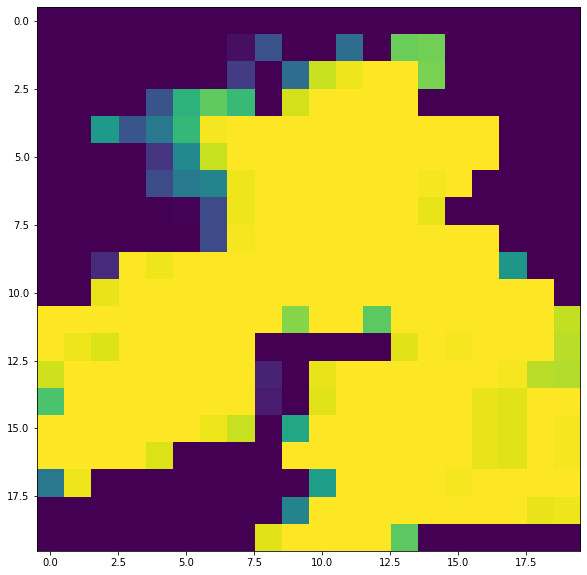

In [37]:
plt.figure(figsize=(10, 10))
plt.imshow(count)